In [1]:
import numpy as np
import pandas as pd
import openpyxl
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pal = sns.dark_palette("palegreen", as_cmap=True)

import itertools
from itertools import combinations
from collections import defaultdict

In [2]:
base = pd.read_excel(r'H:\Users\VV\Desktop\21 Numeros LF.xlsm', sheet_name='Sorteios', engine='openpyxl', index_col='Sorteio')

In [3]:
# N01 = Sorteado 0 ou 1
# R01 = Seq repetições
# A01 = Seq ausencia
base = base[['Data','Bola01','Bola02','Bola03','Bola04',
             'Bola05','Bola06','Bola07','Bola08','Bola09','Bola10',
             'Bola11','Bola12','Bola13','Bola14','Bola15', 
             'Repetidas', 'Resultado', 
             'N01', 'N02', 'N03', 'N04', 'N05', 'N06', 'N07', 'N08', 'N09', 'N10', 
             'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 
             'N21', 'N22', 'N23', 'N24', 'N25', 'N_out_cicle', 'N_cicle', 'Qtd_out', 'Qt_out_repeat',
             'R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08', 'R09', 'R10', 'R11', 'R12', 
             'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22', 'R23', 'R24', 'R25',
             'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 
             'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25'            

]]

In [40]:
balls = base[['Bola01','Bola02','Bola03','Bola04','Bola05','Bola06','Bola07','Bola08','Bola09', 'Bola10', 'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15']]
balls_agg = pd.DataFrame( balls.values.flatten(), columns=['total'] )
balls_count = balls_agg['total'].value_counts(sort=True).to_frame().reset_index()

In [42]:
pair_list = defaultdict(lambda: 0, [])
    
for values in balls.iterrows():
    for k in combinations(values[1], 2):
        pair_list[k] += 1
        #pair_list[k[::-1]] += 1
    
#pairs = pd.DataFrame( list(pair_list.iteritems()), columns=['deznas', 'total'] )
pairs = pd.DataFrame( list(pair_list.items()), columns=['dezenas', 'total'] )

new_col_list = ['Bola1','Bola2']
for n,col in enumerate(new_col_list):
    pairs[col] = pairs['dezenas'].apply(lambda dezena: dezena[n])

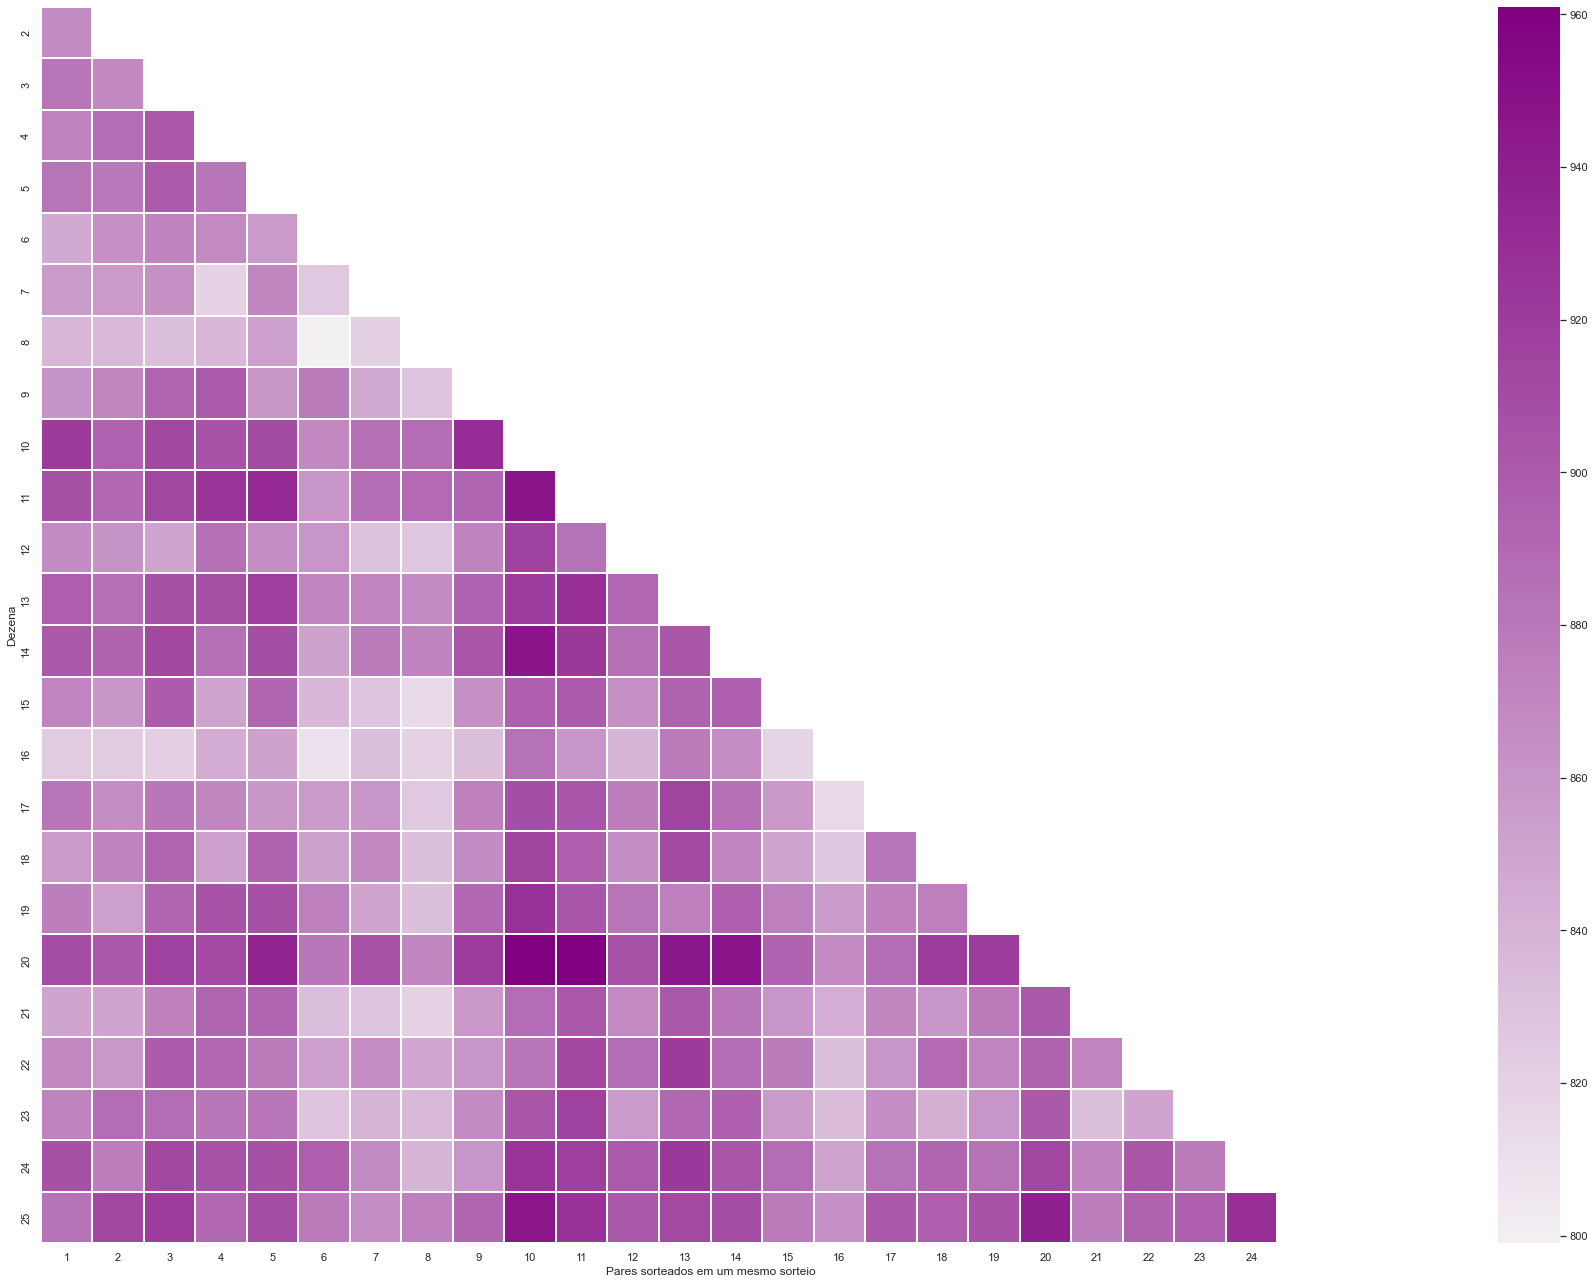

In [46]:
f, ax = plt.subplots(figsize=(33, 18))
pairs2 = pairs.pivot('Bola2','Bola1', 'total')
#pairs2.fillna(-1, inplace=True)
sns.color_palette("Paired")
sns.heatmap(pairs2, square=True, ax=ax, linewidths=.2, cmap=sns.light_palette("purple", as_cmap=True))
ax.set(xlim=(0, 26), ylabel="Dezena", xlabel="Pares sorteados em um mesmo sorteio")
f.tight_layout()

In [47]:
#As 20 combinações mais frequentes, agora no formato de lista:

pairs[['Bola1','Bola2','total']].sort_values('total', ascending=False)[:20]

Bola1  Bola2  total
73      11     20    961
65      10     20    960
86      14     20    948
62      10     14    947
60      10     11    947
68      10     25    946
80      13     20    945
101     20     25    939
35       5     20    936
30       5     11    933
50       9     10    930
69      11     13    929
104     24     25    929
225     10     19    928
76      11     25    927
123      4     11    925
67      10     24    925
82      13     24    923
70      11     14    922
279     13     22    921

In [68]:
#Se desejarmos fazer a mesma coisa com trios de bolinhas sorteadas, a única coisa que devemos alterar é o agrupamento das combinações. Dessa vez, serão tomadas de 3 em 3.

trio_list = defaultdict(lambda: 0, [])
    
for values in balls.iterrows():
    for k in combinations(values[1], 4):
        trio_list[k] += 1
        #pair_list[k[::-1]] += 1


trios = pd.DataFrame( list(trio_list.items()), columns=['dezenas', 'total'] )

new_col_list = ['Bola1','Bola2','Bola3','Bola4']
for n,col in enumerate(new_col_list):
    trios[col] = trios['dezenas'].apply(lambda dezena: dezena[n])

In [70]:
# Os 20 trios de dezenas que mais foram sorteados juntos até hoje:
trios[['Bola1','Bola2','Bola3','Bola4', 'total']].sort_values('total', ascending=True)[:20]

Bola1  Bola2  Bola3  Bola4  total
5559       6      7     21     23    196
5668       7     15     21     23    212
2212       6      7     15     23    217
5949       4      7     15     18    217
5464       5      6     16     17    218
9862       1      2      3     16    219
6856       6      8     15     18    220
3337       8      9     16     24    220
9452       6     18     21     23    220
6045       4     15     16     18    220
1799       4      6      7     15    220
7016       8     15     16     17    220
3173       6     16     17     23    220
9663       6      8     18     23    221
6297       8     15     16     18    221
5656       7     12     21     23    221
5973       4      8     15     18    222
12467      2      3     12     16    222
9821       7     21     23     24    222
5612       6     16     21     23    222

In [74]:
#Se desejarmos fazer a mesma coisa com 12 bolinhas sorteadas, 
#a única coisa que devemos alterar é o agrupamento das combinações.
#Dessa vez, serão tomadas de 12 em 12.

trio_list = defaultdict(lambda: 0, [])
    
for values in balls.iterrows():
    for k in combinations(values[1], 14):
        trio_list[k] += 1
        #pair_list[k[::-1]] += 1


trios = pd.DataFrame( list(trio_list.items()), columns=['dezenas', 'total'] )

new_col_list = ['Bola1','Bola2','Bola3', 'Bola4', 'Bola5', 'Bola6', 
                'Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11','Bola12','Bola13','Bola14']
for n,col in enumerate(new_col_list):
    trios[col] = trios['dezenas'].apply(lambda dezena: dezena[n])

In [78]:
# Os 20 grupos de  12 de dezenas que mais foram sorteados juntos até hoje:
trios[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 
       'Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11', 'Bola12','Bola13','Bola14','total']].sort_values('total', ascending=False)[:20]

Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  Bola7  Bola8  Bola9  Bola10  \
10626      2      3      4      6     12     14     15     17     19      20   
8393       2      3      4      6      7      9     10     11     12      13   
24006      1      3      5      7      8      9     10     11     14      15   
3462       1      5      6      7     10     12     15     16     17      18   
1940       2      3      4      5      6      9     10     12     13      17   
10015      2      4      5      6     12     13     15     17     18      19   
3207       1      3      4      9     11     13     14     15     18      19   
430        1      4      5      6      9     13     14     16     17      19   
24534      3      4      5      8      9     11     12     16     17      19   
1883       1      2      3      4      6      7     13     14     16      18   
10567      1      2      3      4      6      8     12     16     18      19   
3945       1      3      4      6      8      9     12     13     16      19   
12479      2      4      7      8      9     10     11     14     16      18   
32519      1      2      4      5      8      9     11     12     13      16   
6682       1      4      5      6      8     10     11     14     15      16   
14521      3      6      8      9     10     12     15     17     18      19   
122        3      4      5      9     10     11     13     15     16      17   
5171       7      9     11     12     14     15     16     18     19      20   
18076      3      4      5      7      8      9     10     11     15      16   
3463       2      5      6      7     10     12     15     16     17      18   

       Bola11  Bola12  Bola13  Bola14  total  
10626      21      22      24      25      3  
8393       15      17      18      21      2  
24006      19      20      22      25      2  
3462       19      21      24      25      2  
1940       19      23      24      25      2  
10015      22      23      24      25      2  
3207       20      22      24      25      2  
430        20      21      22      24      2  
24534      20      21      22      25      2  
1883       21      22      24      25      2  
10567      21      22      24      25      2  
3945       20      21      22      25      2  
12479      20      21      22      23      2  
32519      18      20      21      22      2  
6682       19      21      23      24      2  
14521      20      21      23      24      2  
122        19      20      24      25      2  
5171       21      23      24      25      2  
18076      18      19      20      24      2  
3463       19      21      24      25      2

In [132]:
matriz = pd.read_excel(r'H:\Users\VV\Desktop\21 Numeros LF.xlsm', sheet_name='matriz', engine='openpyxl', index_col='cod')
top3 = pd.read_excel(r'H:\Users\VV\Desktop\21 Numeros LF.xlsm', sheet_name='top3', engine='openpyxl', index_col='cod')

In [88]:
#matriz['18_linhas'] = matriz['18_linhas'].str.split(',')

In [89]:
#for i in matriz['18_linhas']:
    #print(i)

['01', '04', '05', '06', '07', '08', '09', '12', '13', '15', '16', '17', '18', '20', '22', '23', '24', '25']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '20', '21']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12', '14', '15', '16', '17', '19', '20', '24']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '14', '15', '16', '17', '23', '24']
['01', '02', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '16', '17', '18', '23']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '16', '19', '22', '23']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '13', '14', '15', '16', '17', '19', '22', '24']
['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12', '13', '14', '15', '16', '19', '20', '25']
['01', '02', '03', 

['01', '02', '03', '06', '07', '08', '09', '10', '11', '12', '14', '16', '17', '18', '19', '20', '21', '23']
['02', '04', '05', '06', '07', '08', '09', '10', '11', '14', '15', '17', '18', '19', '20', '21', '23', '24']
['01', '02', '03', '04', '05', '06', '09', '10', '11', '12', '14', '16', '17', '18', '19', '20', '21', '23']
['02', '04', '05', '06', '07', '08', '09', '11', '12', '13', '14', '17', '18', '19', '20', '21', '23', '24']
['02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '17', '18', '19', '20', '21', '23']
['01', '02', '03', '04', '06', '08', '09', '12', '13', '14', '17', '18', '19', '20', '21', '22', '23', '25']
['01', '02', '03', '04', '06', '07', '10', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23']
['01', '04', '05', '08', '09', '10', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24']
['01', '02', '03', '04', '06', '07', '08', '09', '11', '12', '14', '16', '17', '18', '19', '20', '21', '23']
['01', '02', '04', 

['01', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '16', '20', '21', '23', '24']
['01', '03', '04', '05', '06', '07', '08', '09', '10', '12', '13', '14', '15', '16', '20', '21', '23', '24']
['02', '03', '05', '06', '07', '08', '09', '11', '12', '13', '14', '15', '16', '20', '21', '22', '23', '24']
['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '24']
['01', '02', '03', '04', '05', '06', '07', '09', '10', '12', '13', '14', '17', '18', '20', '21', '23', '24']
['01', '02', '03', '04', '05', '07', '08', '09', '10', '11', '12', '13', '14', '16', '17', '20', '21', '24']
['01', '02', '03', '06', '07', '08', '09', '10', '11', '12', '15', '16', '17', '18', '19', '20', '21', '24']
['01', '02', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '17', '20', '21', '23', '24']
['01', '02', '03', '04', '06', '07', '08', '09', '10', '11', '14', '15', '17', '18', '19', '20', '21', '24']
['01', '02', '05', 

['02', '03', '06', '07', '08', '09', '10', '11', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24']
['03', '04', '05', '06', '08', '09', '11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24']
['01', '04', '05', '06', '08', '09', '10', '12', '13', '14', '15', '16', '17', '18', '19', '21', '23', '24']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '16', '19', '20', '21', '22', '23', '24']
['01', '02', '03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '16', '18', '19', '21', '23', '24']
['01', '02', '03', '04', '06', '07', '08', '09', '11', '12', '14', '16', '19', '21', '22', '23', '24', '25']
['01', '02', '03', '04', '07', '08', '09', '10', '11', '12', '13', '14', '16', '19', '20', '21', '23', '24']
['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '13', '14', '16', '19', '20', '21', '23', '24']
['01', '02', '03', '04', '05', '06', '07', '10', '12', '13', '14', '15', '16', '18', '19', '21', '23', '24']
['01', '02', '04', 

['01', '02', '04', '07', '08', '09', '10', '11', '12', '13', '16', '17', '19', '20', '21', '22', '23', '24']
['01', '04', '05', '06', '07', '08', '11', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24']
['02', '03', '05', '06', '09', '10', '11', '12', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24']
['01', '04', '06', '07', '08', '09', '10', '11', '13', '14', '16', '17', '19', '20', '21', '22', '23', '24']
['01', '04', '05', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['01', '02', '04', '07', '08', '09', '10', '11', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24']
['01', '03', '06', '08', '10', '11', '12', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['01', '02', '03', '04', '07', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
['01', '02', '03', '04', '05', '11', '12', '13', '14', '16', '18', '19', '20', '21', '22', '23', '24', '25']
['01', '02', '03', 

['02', '03', '04', '05', '06', '07', '09', '10', '12', '13', '14', '15', '16', '18', '20', '21', '23', '25']
['01', '02', '03', '04', '05', '08', '09', '10', '11', '12', '13', '14', '15', '16', '18', '20', '23', '25']
['01', '02', '04', '05', '06', '07', '10', '11', '12', '13', '14', '15', '16', '18', '20', '21', '23', '25']
['01', '02', '03', '04', '05', '06', '08', '09', '12', '13', '14', '17', '18', '20', '21', '22', '23', '25']
['01', '02', '03', '04', '06', '07', '08', '09', '11', '12', '13', '14', '17', '18', '20', '23', '24', '25']
['01', '02', '04', '05', '06', '07', '09', '10', '11', '12', '13', '14', '16', '17', '18', '20', '23', '25']
['04', '05', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '22', '23', '25']
['01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '14', '15', '17', '18', '20', '23', '24', '25']
['01', '02', '04', '06', '07', '08', '09', '11', '12', '13', '14', '15', '16', '17', '18', '20', '23', '25']
['01', '02', '04', 

['01', '02', '03', '04', '05', '06', '08', '10', '11', '13', '14', '15', '16', '17', '20', '21', '24', '25']
['02', '04', '05', '06', '07', '08', '09', '11', '13', '14', '15', '16', '17', '18', '20', '21', '24', '25']
['01', '02', '03', '04', '07', '08', '09', '10', '11', '13', '14', '16', '17', '18', '20', '21', '24', '25']
['01', '02', '03', '04', '06', '07', '08', '11', '12', '13', '14', '15', '16', '17', '20', '21', '24', '25']
['01', '02', '03', '05', '06', '07', '08', '10', '11', '12', '15', '16', '17', '20', '21', '22', '24', '25']
['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17', '20', '21', '24', '25']
['02', '03', '04', '06', '07', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '24', '25']
['02', '03', '06', '07', '08', '09', '10', '13', '14', '15', '16', '17', '19', '20', '21', '22', '24', '25']
['01', '02', '05', '06', '07', '09', '10', '12', '14', '15', '16', '17', '20', '21', '22', '23', '24', '25']
['02', '03', '05', 

['02', '03', '04', '08', '09', '10', '11', '12', '15', '16', '17', '18', '19', '20', '21', '23', '24', '25']
['03', '04', '06', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23', '24', '25']
['02', '03', '05', '08', '09', '10', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['02', '03', '05', '08', '09', '11', '12', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25']
['04', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23', '24', '25']
['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '18', '21', '23', '24', '25']
['01', '02', '03', '05', '06', '07', '08', '09', '10', '11', '14', '16', '20', '21', '22', '23', '24', '25']
['01', '02', '03', '04', '06', '07', '08', '10', '11', '12', '13', '14', '19', '20', '21', '23', '24', '25']
['01', '03', '04', '05', '06', '08', '09', '10', '11', '12', '14', '16', '18', '19', '21', '23', '24', '25']
['02', '03', '05', 

['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
['04', '06', '07', 

In [133]:
matriz

N01  N02  N03  N04  N05  N06  N07  N08  N09  N10  N11  N12  N13  N14  \
cod                                                                          
1       1    4    5    6    7    8    9   12   13   15   16   17   18   20   
2       1    2    3    4    5    6    7    8    9   10   11   12   13   14   
3       1    2    3    4    5    6    7    8    9   11   12   14   15   16   
4       1    2    3    4    5    6    7    8    9   10   11   12   14   15   
5       1    2    3    4    5    6    7    8   10   11   12   13   14   15   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9950    4    6    7    8   11   13   14   15   16   17   18   19   20   21   
9951    4    6    7    8   11   13   14   15   16   17   18   19   20   21   
9952    4    6    7    8   11   13   14   15   16   17   18   19   20   21   
9953    4    6    7    8   11   13   14   15   16   17   18   19   20   21   
9954    4    6    7    8   11   13   14   15   16   17   18   19   20   21   

      N15  N16  N17  N18                                          18_linhas  
cod                                                                          
1      22   23   24   25  01,04,05,06,07,08,09,12,13,15,16,17,18,20,22,2...  
2      15   16   20   21  01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,1...  
3      17   19   20   24  01,02,03,04,05,06,07,08,09,11,12,14,15,16,17,1...  
4      16   17   23   24  01,02,03,04,05,06,07,08,09,10,11,12,14,15,16,1...  
5      16   17   18   23  01,02,03,04,05,06,07,08,10,11,12,13,14,15,16,1...  
...   ...  ...  ...  ...                                                ...  
9950   22   23   24   25  04,06,07,08,11,13,14,15,16,17,18,19,20,21,22,2...  
9951   22   23   24   25  04,06,07,08,11,13,14,15,16,17,18,19,20,21,22,2...  
9952   22   23   24   25  04,06,07,08,11,13,14,15,16,17,18,19,20,21,22,2...  
9953   22   23   24   25  04,06,07,08,11,13,14,15,16,17,18,19,20,21,22,2...  
9954   22   23   24   25  04,06,07,08,11,13,14,15,16,17,18,19,20,21,22,2...  

[9954 rows x 19 columns]

In [134]:
x_queda_de_ligacao = matriz

In [135]:
def palavrasEncontrada(texto):
    frases = []
    for palavras in texto:
        encontrada = [p for p in palavras.split() if p in match]
        frases.append((encontrada))
    return frases    

In [136]:
match = ['01', '02', '03']
x_queda_de_ligacao['match'] = x_queda_de_ligacao['18_linhas'].str.contains('|'.join(match))
x_queda_de_ligacao = x_queda_de_ligacao[x_queda_de_ligacao['match']==True] 
avalia_ligacao = x_queda_de_ligacao['18_linhas'].astype(str)
x_queda_de_ligacao['match_queda_de_ligacao'] = palavrasEncontrada(avalia_ligacao)

C:\Users\vinic\AppData\Local\Temp/ipykernel_2164/4287067182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_queda_de_ligacao['match_queda_de_ligacao'] = palavrasEncontrada(avalia_ligacao)


In [137]:
x_queda_de_ligacao

N01  N02  N03  N04  N05  N06  N07  N08  N09  N10  N11  N12  N13  N14  \
cod                                                                          
1       1    4    5    6    7    8    9   12   13   15   16   17   18   20   
2       1    2    3    4    5    6    7    8    9   10   11   12   13   14   
3       1    2    3    4    5    6    7    8    9   11   12   14   15   16   
4       1    2    3    4    5    6    7    8    9   10   11   12   14   15   
5       1    2    3    4    5    6    7    8   10   11   12   13   14   15   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9512    1    2    4    5    8    9   12   14   15   17   18   19   20   21   
9513    1    5    6    8   10   12   13   14   15   17   18   19   20   21   
9514    2    5    6    9   10   11   12   13   16   17   18   19   20   21   
9515    2    3    4    5    6   12   13   15   16   17   18   19   20   21   
9516    1    2    4    5    8    9   11   14   16   17   18   19   20   21   

      N15  N16  N17  N18                                          18_linhas  \
cod                                                                           
1      22   23   24   25  01,04,05,06,07,08,09,12,13,15,16,17,18,20,22,2...   
2      15   16   20   21  01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,1...   
3      17   19   20   24  01,02,03,04,05,06,07,08,09,11,12,14,15,16,17,1...   
4      16   17   23   24  01,02,03,04,05,06,07,08,09,10,11,12,14,15,16,1...   
5      16   17   18   23  01,02,03,04,05,06,07,08,10,11,12,13,14,15,16,1...   
...   ...  ...  ...  ...                                                ...   
9512   22   23   24   25  01,02,04,05,08,09,12,14,15,17,18,19,20,21,22,2...   
9513   22   23   24   25  01,05,06,08,10,12,13,14,15,17,18,19,20,21,22,2...   
9514   22   23   24   25  02,05,06,09,10,11,12,13,16,17,18,19,20,21,22,2...   
9515   22   23   24   25  02,03,04,05,06,12,13,15,16,17,18,19,20,21,22,2...   
9516   22   23   24   25  01,02,04,05,08,09,11,14,16,17,18,19,20,21,22,2...   

      match match_queda_de_ligacao  
cod                                 
1      True                     []  
2      True                     []  
3      True                     []  
4      True                     []  
5      True                     []  
...     ...                    ...  
9512   True                     []  
9513   True                     []  
9514   True                     []  
9515   True                     []  
9516   True                     []  

[9360 rows x 21 columns]

In [138]:
x_queda_de_ligacao.loc[:,('x_queda_de_ligacao')] = 1

c:\users\vinic\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [139]:
matriz2 = matriz.join([
    x_queda_de_ligacao[['x_queda_de_ligacao','match_queda_de_ligacao']]])

In [140]:
matriz = matriz2

In [141]:
# substitui os valores nulos
matriz['x_queda_de_ligacao'].fillna(0, inplace = True) 
matriz['match_queda_de_ligacao'].fillna('0', inplace = True) 

In [142]:
matriz['qtd_match'] = matriz['x_queda_de_ligacao']

In [143]:
matriz['topic_match'] = np.where(matriz['x_queda_de_ligacao'] == 1, 'queda_de_ligacao, ','')

In [144]:
matriz.head()

N01  N02  N03  N04  N05  N06  N07  N08  N09  N10  N11  N12  N13  N14  \
cod                                                                         
1      1    4    5    6    7    8    9   12   13   15   16   17   18   20   
2      1    2    3    4    5    6    7    8    9   10   11   12   13   14   
3      1    2    3    4    5    6    7    8    9   11   12   14   15   16   
4      1    2    3    4    5    6    7    8    9   10   11   12   14   15   
5      1    2    3    4    5    6    7    8   10   11   12   13   14   15   

     N15  N16  N17  N18                                          18_linhas  \
cod                                                                          
1     22   23   24   25  01,04,05,06,07,08,09,12,13,15,16,17,18,20,22,2...   
2     15   16   20   21  01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,1...   
3     17   19   20   24  01,02,03,04,05,06,07,08,09,11,12,14,15,16,17,1...   
4     16   17   23   24  01,02,03,04,05,06,07,08,09,10,11,12,14,15,16,1...   
5     16   17   18   23  01,02,03,04,05,06,07,08,10,11,12,13,14,15,16,1...   

     match  x_queda_de_ligacao match_queda_de_ligacao  qtd_match  \
cod                                                                
1     True                 1.0                     []        1.0   
2     True                 1.0                     []        1.0   
3     True                 1.0                     []        1.0   
4     True                 1.0                     []        1.0   
5     True                 1.0                     []        1.0   

            topic_match  
cod                      
1    queda_de_ligacao,   
2    queda_de_ligacao,   
3    queda_de_ligacao,   
4    queda_de_ligacao,   
5    queda_de_ligacao,